In [19]:

#Zona de librerias de importacion

from matplotlib import pyplot as plt  
import random
import math as mt
import numpy as np
from scipy.stats import linregress

## Graficas

1. Estos son los metodos para generar las graficas
2. graficaLog es el que genera graficas logaritmicas
3. grafica28 genera graficas individuales
4. grafica30 genera graficas dobles para ipr f y ipr p

### Nota Correr primero que cualquier metodo

In [20]:
def graficaLog(x,y):
    x = np.array(x)  # Convierte x en un arreglo NumPy
    y = np.array(y)  # Convierte y en un arreglo NumPy
    plt.loglog(x, y)
    # Realiza la regresión lineal en los datos logarítmicos
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calcula la pendiente (que es el exponente de la ecuación logarítmica)
    pendiente = slope

    # Muestra la pendiente
    print(f'La pendiente de la gráfica logarítmica es: {pendiente}')

    # Crea un gráfico de dispersión para los datos logarítmicos
    plt.scatter(x, y, label='Datos')

    # Añade la línea de regresión lineal
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='red', label='Regresión Lineal')
    # Calculate the variance
    variance = np.var(y)
    # Print the slope and variance
    print("Pendiente:", slope)
    print("Varianza:", variance)
    # Configura el gráfico
    plt.xlabel('Gasto')
    plt.ylabel('Diferencia Presión')
    plt.legend()
    plt.grid(True)

    # Muestra el gráfico
    plt.show()
    

def graph28(x, y, graph_title):
    # Crear el gráfico
    plt.plot(x, y)
    # Personalizar el gráfico
    plt.title(graph_title)
    plt.xlabel("Qo")
    plt.ylabel("Pwf")
    plt.legend()
    plt.grid(True)
    # Mostrar el gráfico
    plt.show()
    
def graph30(x1, y1, x2, y2):
    # Crear el gráfico
    plt.plot(x1, y1, label='IPR futura')
    plt.plot(x2, y2, label='IPR presente')
    
    # Personalizar el gráfico
    plt.title('Comparación de IPR futura y presente')
    plt.xlabel("Qo")
    plt.ylabel("Pwf")
    plt.grid(True)
    plt.legend()
    
    # Mostrar el gráfico
    plt.show()


## Metodo Vogel Generalizado

### Datos

In [8]:
#Objetivo determinar qo o gasto del aceite 
#NOTE - Todos los datos deben estar en las unidades del metodo (inglesas)

qo = 0.0 #bpd gasto de aceite
pr = 0.0 #Presion media del yacimiento psia
pwf = 0.0 #Presion de fondo fluyente psia
pb = 0.0 #Presion de Poro psia
r = 0 #Es el numero de iteraciones para la grafica
print(f'qo = {qo} pr = {pr} pwf = {pwf} pb = {pb} r = {r}')

qo = 200.0 pr = 4000.0 pwf = 3000.0 pb = 2000.0 r30


### Programa

In [ ]:

#Funciones y logica del metodo
def caseA(qo, pr, pwf, pb, r):
    # Paso 1: obtener el IP
    J = qo / (pr - pwf)
    print(f'IP = {round(J,3)}')
    # Paso 2: calcular el gasto a la presión de saturación
    qb = J * (pr - pb)
    print(f'qb = {round(qb,3)}')
    # Paso 3: calcular qc
    qc = (qb * pb) / (1.8 * (pr - pb))
    print(f'qc = {round(qc,3)}')
    # Paso 4: graficar IPR
    #print(int(pwf / r))
    lpwf = [pwf - i for i in range(0, int(pwf), int(pwf / r))]  # la "l" inicial significa que es una lista
    lqos, lqob = dict(), dict()
    for i in lpwf:
        if i >= pb:
            lqob[i] = J * (pr - i)
        else:
            lqos[i] = round(
                qc * (1.8 * (pr / pb) - 0.8 - 0.2 * (i / pb) - 0.8 * pow((i / pb), 2)), 3
            )
    lqos[0] = round(
                qc * (1.8 * (pr / pb) - 0.8), 3
            )
    print(f'Diccionario presiones iteradas = {lpwf}')
    print(f'Diccionario bajo saturado = {lqob}')
    print(f'Diccionario saturado = {lqos}')
    graph28(list(lqob.values()), list(lqob.keys()), "Gráfico de bajo Saturado")
    graph28(list(lqos.values()),  list(lqos.keys()), "Gráfico de Saturado")


    
    
def caseB(qo, pr, pwf, pb, r):   
    #Paso 1 Calcular el valor de qc 
    qc = qo / (1.8 * (pr / pb) - 0.8 - 0.2 * (pwf / pb) - 0.8 * pow((pwf / pb), 2))
    print(f'qc = {qc}')
    #Paso 3 Calcular el gasto a la presión de burbuja
    qb = ( qc * 1.8 * ( pr-pb )) / pb
    print(f'qb = {qb}')
    #Paso4 Determinar el índice de productividad4.Determinar el índice de productividad
    J = qb / ( pr-pb )
    print(f'IP = {J}')
    #Paso 2 Calcular el gasto para cualquier presión de fondo fluyente por debajo de la presión de burbuja
    #print(int(pwf / r))
    lpwf = [pwf - i for i in range(0, int(pwf), int(pwf / r))]  # la "l" inicial significa que es una lista
    lqos, lqob = dict(), dict()
    for i in lpwf:
        if i >= pb:
            lqob[i] = J * (pr - i)
        else:
            lqos[i] = round(
                qc * (1.8 * (pr / pb) - 0.8 - 0.2 * (i / pb) - 0.8 * pow((i / pb), 2)), 3
            )
    lqos[0] = round(
                qc * (1.8 * (pr / pb) - 0.8), 3
            )
    
    print(f'Diccionario presiones iteradas = {lpwf}')
    print(f'Diccionario bajo saturado = {lqob}')
    print(f'Diccionario saturado = {lqos}')
    graph28(list(lqob.values()), list(lqob.keys()), "Gráfico de bajo Saturado")
    graph28(list(lqos.values()),  list(lqos.keys()), "Gráfico de Saturado")
    


In [ ]:
#Prueba Vogel
if pwf >= pb:
    caseA(qo, pr, pwf, pb, r)
else:
    caseB(qo, pr, pwf, pb, r)

## Metodo Back Pressure

### Datos

In [ ]:
#NOTE - Todos los datos deben estar en las unidades del metodo (inglesas)

bk_pws = 0.0 # Presion 
bk_pwf1 = 0.0 #Presion de fondo fluyente punto 1
bk_pwf2 = 0.0 #Presion de fondo fluyente punto 2
bk_qg1 = 0.0 #Gasto del gas punto 1
bk_qg2 = 0.0 #Gasto del gas punto 2
bk_puntos = 0 # Debe ser entero este es el numero de iteraciones para la grafica

### Programa


In [ ]:

#Funciones y desarrollo del metodo
#r es el numero de punto que quiere graficar hasta qomax

def backpressure(pr,pwf1,pwf2,qg1,qg2,r):
    #Calculo de m
    a = mt.log( pow(pr,2) - pow(pwf2,2) , 10 ) - mt.log( pow(pr,2) - pow(pwf1,2) ,10 )
    b = mt.log(qg2,10) - mt.log(qg1,10)
    m = a /b #Esta es m
    
    # print(pow(pr,2) - pow(pwf1,2))
    print(f' m = {m}')
    #Calculo de n
    n = 1/m
    print(f' n = {n}')
    #Calculo de C
    c = qg1 / pow(pow(pr,2) - pow(pwf1,2) ,n)
    print(f' c = {c}')
    #Calculo de qg
    pwf = [pr]
    for i in range(1,r+1):
        aux = round((pr-14.7) / r , 3)
        pwf.append(round(pr - (aux*i),3)) #Metodo para agregar datos de pwf
        if i == r:
            pwf.append(0)
    qg = list()
    aux2 = 0
    for i in pwf:
        qg.append(round(c * pow((pow(pr,2)-pow(i,2)),n),3))
        pwf[aux2] = round(pow(pr,2) - pow(pwf[aux2],2),3)
        aux2 += 1
        
    print (f'Lista de presiones: {pwf}\nLista de gastos:{qg}')  
    
    graficaLog(qg,pwf)
    

    

    


4137.629999999976
1.3291121026040713
0.7523819834615483
0.008034450824432368
[0.0, 30576.917, 58056.99, 82440.217, 103726.6, 121916.137, 137008.83, 149004.677, 157903.68, 163705.837, 166411.15, 166627.24]
[0.0, 19.041, 30.846, 40.158, 47.733, 53.904, 58.851, 62.687, 65.484, 67.286, 68.121, 68.187]
La pendiente de la gráfica logarítmica es: 2571.7007100124106
Pendiente: 2571.7007100124106
Varianza: 2986717519.784987


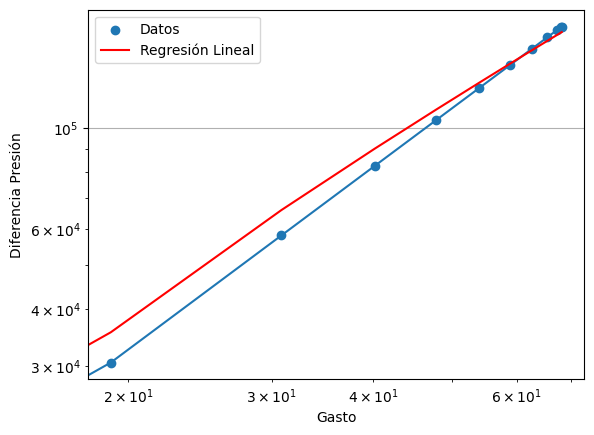

In [73]:
#Prueba  

#backpressure(408.2,403.1,378.5,4.228,15.552,10)
backpressure(bk_pws, bk_pwf1, bk_pwf2, bk_qg1, bk_qg2, bk_puntos)

## Metodo Eickmeier

### Datos

In [ ]:
#NOTE - Todos los datos deben estar en las unidades del metodo (inglesas)
#Calculos de qoF y qomaxF

me_qo = 0.0 #bpd
me_prP = 0.0 #Presión del yacimiento actual
me_pwf = 0.0  #Presion de fondo fluyente psia
me_prF = 0.0  #Presión del yacimiento futura



### Programa


In [81]:
#Metodos y funciones 
#Paso 1 De una prueba de producción, con la ecuación de Vogel, determinar qo(max)Presente
def qomaxP (qoP,pwf,prP):
    return qoP / ( 1 - 0.2 * (pwf/prP) - 0.8 * pow((pwf/prP),2))
#Este metodo calcula el gasto maximo presente


#Paso 2 Para determinar qo(max)Futura utilizar qo(max)Presente
def qomaxF(prF,prP,qomP):
    return qomP * pow((prF/prP),3)
#Este metodo calcula el gasto maximo futuro

#Paso 3 Para determinar qo Futura
def eickmeier(qoP,prP,pwf,prF):
    fqomaxP = round(qomaxP (qoP,pwf,prP),3)
    fqomaxF = round(qomaxF(prF,prP,fqomaxP),3)
    fqoF = round(fqomaxF * (1 - 0.2 * (pwf/prF) - 0.8 * pow((pwf/prF),2)),3)
    print(f'qomaxP= {fqomaxP}\nqomaxF= {fqomaxF}\nqoF= {fqoF}')
    
#Metodo completo

In [82]:
#Pruebas
# eickmeier(200,3000,2500,2000)
eickmeier(me_qo,me_prP,me_pwf,me_prF)

qomaxP= 720.0
qomaxF= 213.333
qoF= -106.666


## Metodo de Standing

### Datos

In [21]:
#Nota, tomar en cuenta que los datos introducidos  deben ser en unidades inglesas 
#Calculos de qoF y qomaxF

ms_qoP = 400 #El gasto presente
ms_prP = 2250 #Pr Presente 
ms_pwf = 1815 #Presion de fondo fluyente
ms_prF = 1800 #Pr Futura

#NOTE - El primer valor de la lista es el presente y el segundo el futuro
#Tomar esto en cuenta en sus ejercicios de prueba
ms_kro = {'P': 0.815,'F': 0.685} # kro 
ms_viz = {'P': 3.11,'F': 3.59} #Vizcosidad presente y futura
ms_Bo = {'P': 1.173,'F': 1.150} #Bo presente y futuro
ms_n = 10 #Es el numero de iteraciones para el grafico



### Programa

El método requiere de datos de permeabilidad relativa del aceite, viscosidad y factor de volumen en función de la presión del yacimiento.
La saturación del aceite como función de la presión promedio del yacimiento, puede determinarse utilizando balance de materia, por lo tanto, la permeabilidad relativa del aceite puede ser determinada si los datos de permeabilidad se conocen. Las propiedades de los fluidos (viscosidad y factor de volumen) pueden obtenerse de análisis de laboratorio o correlaciones empíricas.

In [22]:
#Metodos y funciones


def standing(qoP,prP,pwf,prF,kro,viz,Bo, n):
    #Paso 1 calculo de qoMax Presente 
    qoMaxP = qoP / ( 1 - 0.2 * (pwf/prP) - 0.8 * pow((pwf/prP),2))
    print('Gasto Max Presnete: ' + str(round(qoMaxP,3)))

    #Paso 2 Usar las propiedades de los fluidos, para calcular IPR presente y futuro
    JF = (kro['F'])/(viz['F']*Bo['F']) #viz es la vizcosidad
    print('IPR Futuro: ' + str(round(JF,3)))
    
    JP = (kro['P'])/(viz['P']*Bo['P']) # IPR Presente
    
    #Paso 3 Calcular 𝑞𝑜(max)𝐹
    qoMaxF = qoMaxP * ((prF*JF)/(prP*JP)) 
    print('Gasto Max Futuro: ' + str(round(qoMaxF,3)))
    
    
    #Paso 4 Preparar elementos para la grafica
    # l Representa que sera una lista 
    lpwfP = list(round((prP - (prP/n)*i),3) for i in range (1,n+1))
    print(f'Lista de presiones Presente: {lpwfP}')
    
    lpwfF = list(round((prF - (prF/n)*i),3) for i in range (1,n+1))
    print(f'Lista de presiones futura: {lpwfF}')
    
    lqoP = list(round(qoMaxP * ( 1 - 0.2 * (pwf/prP) - 0.8 * pow((pwf/prP),2)),3) for pwf in lpwfP)
    print(f'Lista de Gastos Presente: {lqoP}')
    
    lqoF = list(round(qoMaxF * ( 1 - 0.2 * (pwf/prF) - 0.8 * pow((pwf/prF),2)),3) for pwf in lpwfF)
    print(f'Lista de Futuras Futuras: {lqoF}')
    
    
    graph30(lqoP, lpwfP, lqoF, lpwfF)


Gasto Max Presnete: 1257.475
IPR Futuro: 0.166
Gasto Max Futuro: 747.117
Lista de presiones Presente: [2025.0, 1800.0, 1575.0, 1350.0, 1125.0, 900.0, 675.0, 450.0, 225.0, 0.0]
Lista de presiones futura: [1620.0, 1440.0, 1260.0, 1080.0, 900.0, 720.0, 540.0, 360.0, 180.0, 0.0]
Lista de Gastos Presente: [216.286, 412.452, 588.498, 744.425, 880.232, 995.92, 1091.488, 1166.937, 1222.266, 1257.475]
Lista de Futuras Futuras: [128.504, 245.054, 349.651, 442.293, 522.982, 591.716, 648.497, 693.324, 726.197, 747.117]


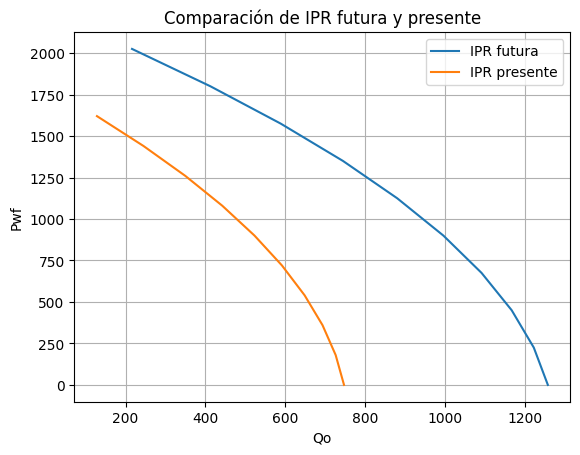

In [23]:
standing(ms_qoP,ms_prP,ms_pwf,ms_prF,ms_kro,ms_viz,ms_Bo, ms_n)